In [1]:
%load_ext autoreload
%autoreload 2



In [2]:



from PIL import Image, ImageChops, ImageFilter
import numpy as np

import os
import scipy as sp

from src import Background, gkern, bbox_iou
from random import shuffle
import time

from scipy import ndimage as ndi

from skimage import feature

import glob

from src import detect_faces, show_bboxes, get_list_of_files, resize_with_pad, trim



%matplotlib inline
import matplotlib.pyplot as plt
import ipywidgets as wdg  # Using the ipython notebook widgets

/home/suleman/anaconda/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


In [3]:
# Loading list of images

backgrounds = os.listdir('Backgrounds/')
shuffle(backgrounds)
# faces = os.listdir('cropped_better/')
# faces = glob.glob('neck_cropped_faces/*jpg')
faces = glob.glob('cropped_fewer/*jpg')

num_back = len(backgrounds)
num_faces = len(faces)

In [4]:
faces = [face.split('/')[1] for face in faces]
faces

['cropped_71.jpg',
 'cropped_66.jpg',
 'cropped_112.jpg',
 'cropped_26.jpg',
 'cropped_29.jpg',
 'cropped_120.jpg',
 'cropped_40.jpg',
 'cropped_101.jpg',
 'cropped_161.jpg',
 'cropped_179.jpg',
 'cropped_61.jpg',
 'cropped_189.jpg',
 'cropped_138.jpg',
 'cropped_162.jpg',
 'cropped_118.jpg',
 'cropped_8.jpg',
 'cropped_44.jpg',
 'cropped_147.jpg',
 'cropped_132.jpg',
 'cropped_177.jpg',
 'cropped_149.jpg',
 'cropped_13.jpg',
 'cropped_113.jpg',
 'cropped_167.jpg',
 'cropped_168.jpg',
 'cropped_146.jpg',
 'cropped_3.jpg',
 'cropped_151.jpg',
 'cropped_182.jpg',
 'cropped_33.jpg',
 'cropped_84.jpg',
 'cropped_117.jpg',
 'cropped_195.jpg',
 'cropped_144.jpg',
 'cropped_94.jpg',
 'cropped_175.jpg',
 'cropped_91.jpg',
 'cropped_38.jpg',
 'cropped_181.jpg',
 'cropped_63.jpg',
 'cropped_75.jpg',
 'cropped_199.jpg',
 'cropped_77.jpg',
 'cropped_19.jpg',
 'cropped_11.jpg',
 'cropped_30.jpg',
 'cropped_139.jpg',
 'cropped_25.jpg',
 'cropped_39.jpg',
 'cropped_121.jpg',
 'cropped_73.jpg',
 'crop

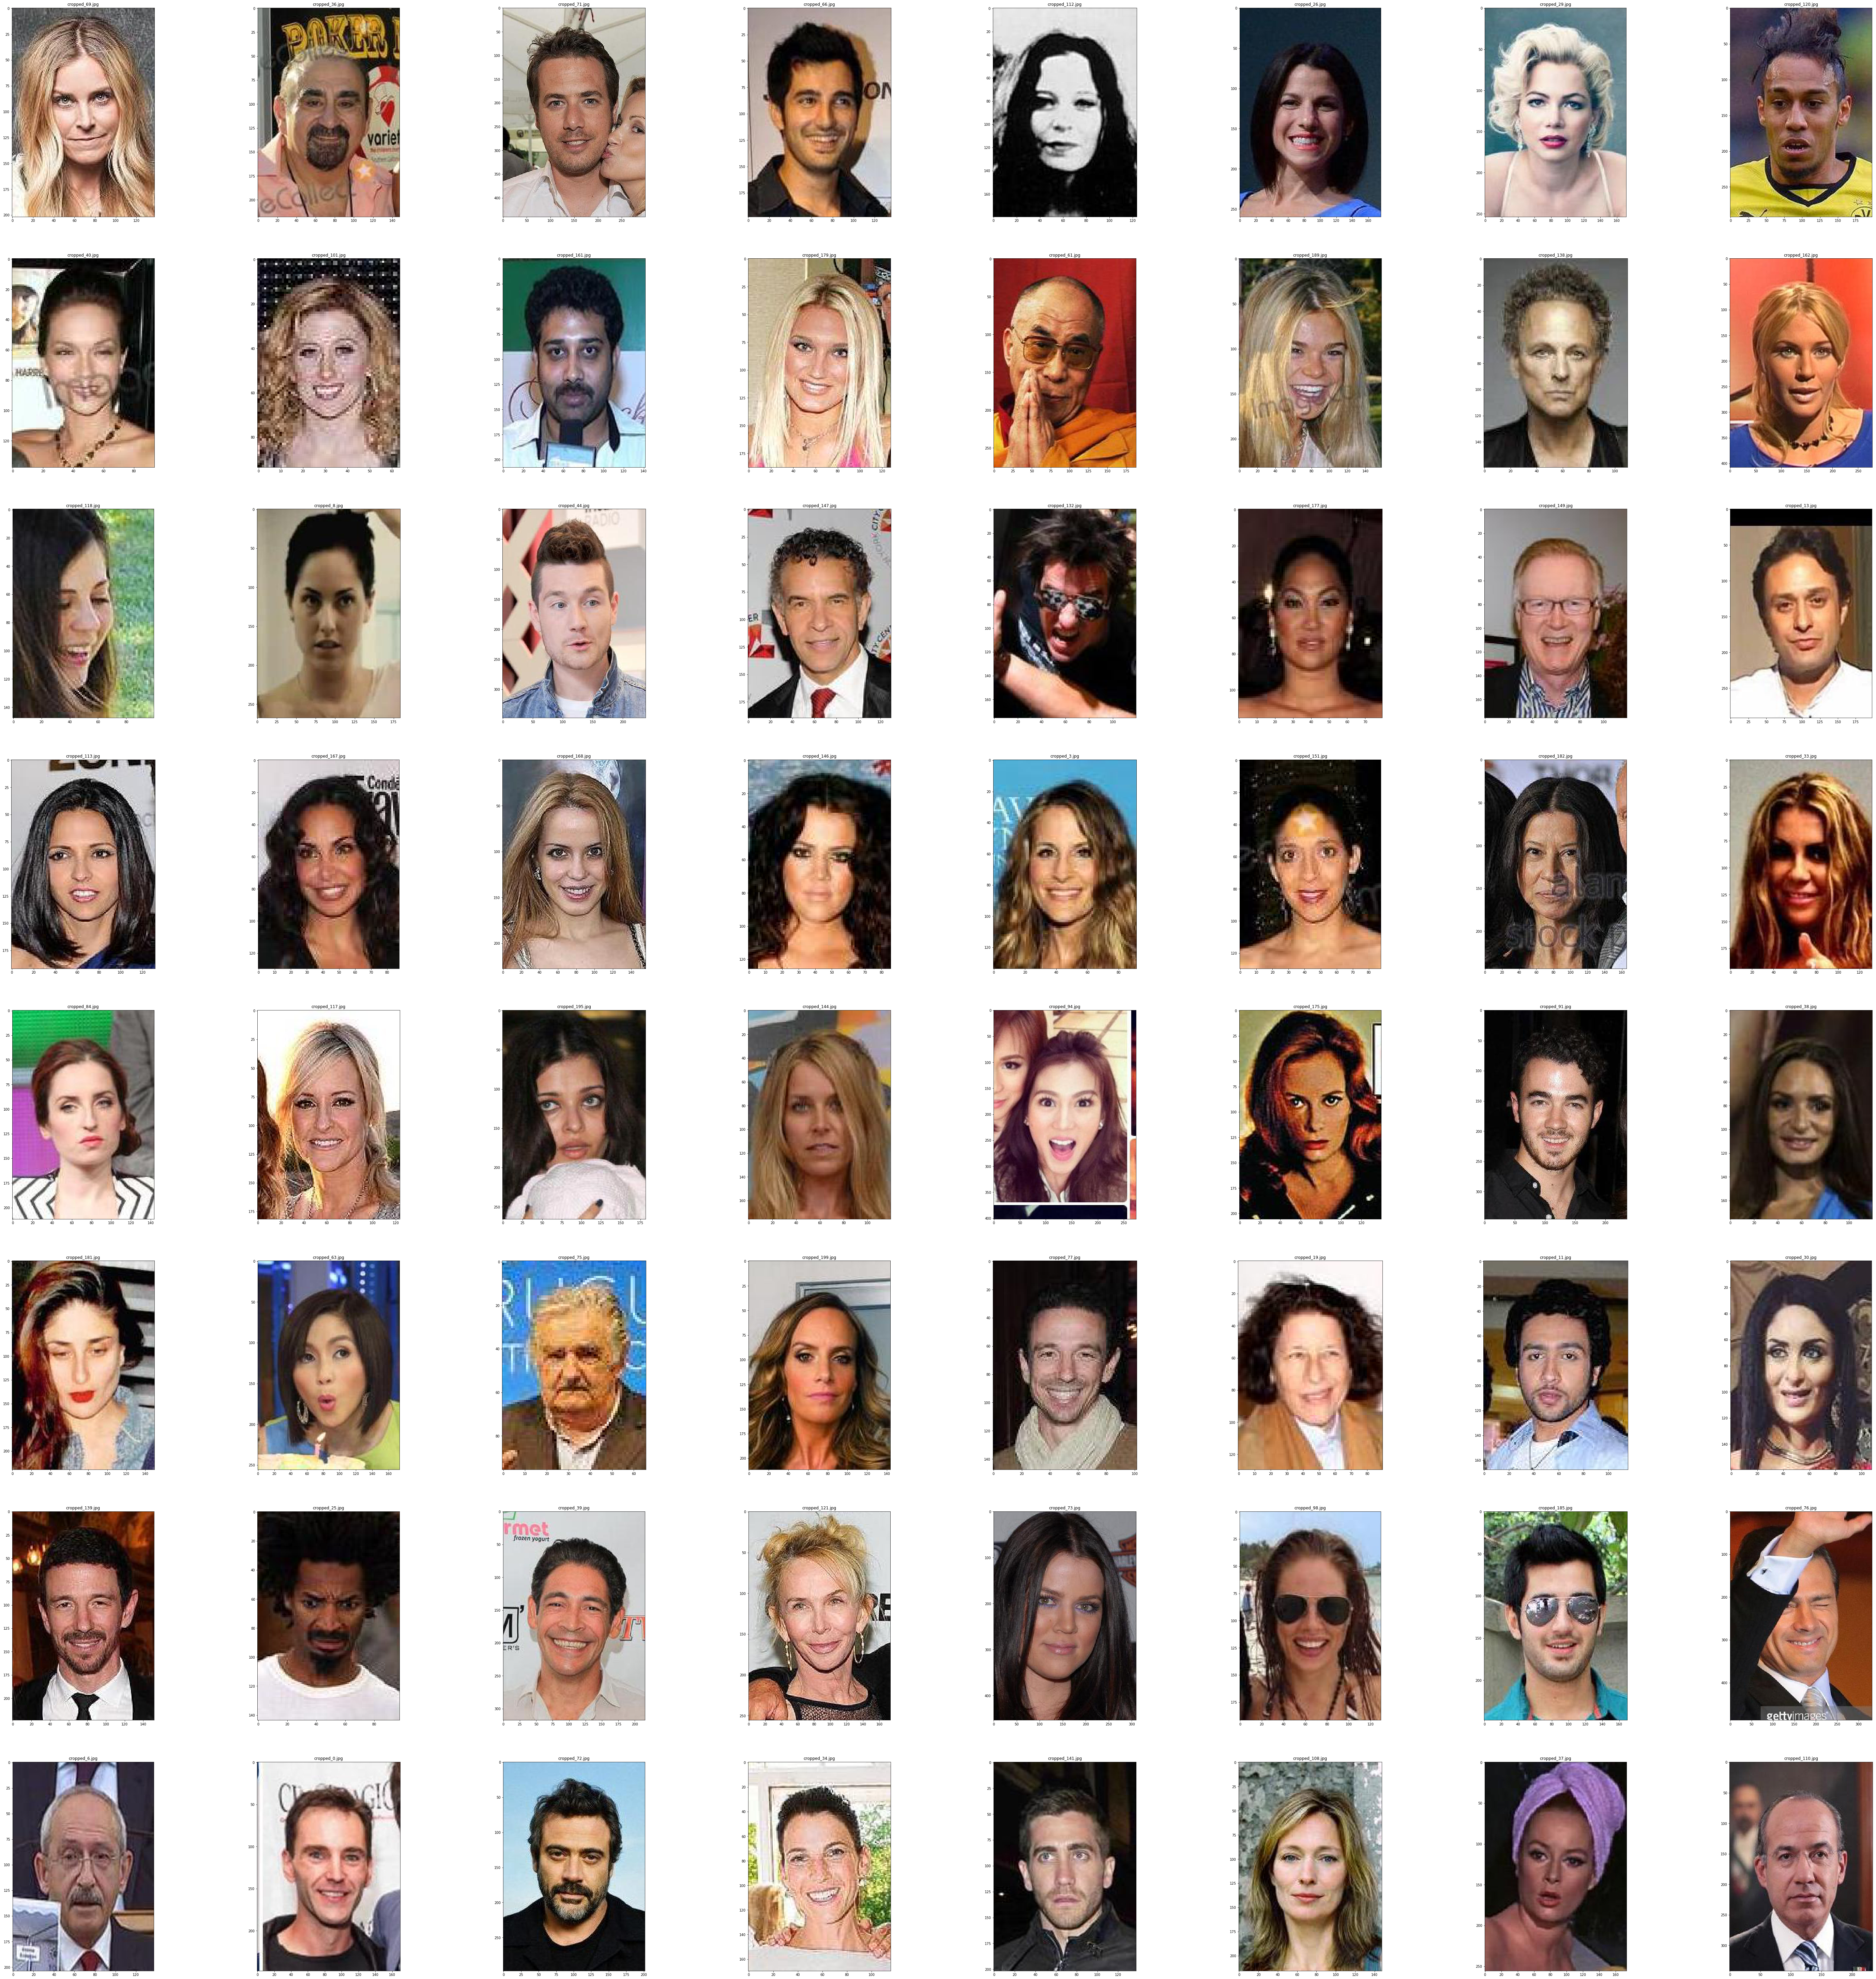

In [5]:
start_p = 192
plt.figure(figsize=(40,40))
for i in range(64):
    plt.subplot(8,8,i+1)
    plt.imshow(Image.open('cropped_fewer/'+faces[(i+start_p)%num_faces]))
    plt.title(faces[(i+start_p)%num_faces])
    
plt.subplots_adjust(left = 0.0, right = 2, wspace=0.0, top=2, bottom=0)

In [ ]:
# def trim(im, th1=2, th2=10):
#     data = np.array(im.convert('HSV'))
# #     data = np.array(im_[:,:,1])
#     mask = np.logical_or(data[...,1]>th1,data[...,2] <(255-th2))
#     mask = Image.fromarray(255*mas
k.astype('uint8'))
# #     im.putalpha(mask)
#     return mask
    

In [ ]:
np.where(np.array(faces) == 'clinton.jpg')

### Start Random tests

In [ ]:
face = Image.open('neck_cropped_faces/'+faces[28])
bg = Image.open('Backgrounds/'+backgrounds[99])
bg = bg.resize((512,512))
face = face.resize((200,250))
face
# print()

In [ ]:
bg


In [ ]:

new_face = face.convert('HSV')

In [ ]:
plt.imshow(np.array(new_face))

In [ ]:
# face = Image.open('neck_cropped_faces/'+faces[61])
mask = trim(face, 1,5)
face.putalpha(mask)
mask

In [ ]:

plt.subplot(1,2,1)
plt.imshow(mask)
plt.subplot(1,2,2)
# mask1 = mask.filter(ImageFilter.UnsharpMask(radius=2000))
mask1 = mask.filter(ImageFilter.FIND_EDGES)
plt.imshow(mask1)

In [ ]:
plt.subplot(1,2,1)
plt.imshow(face)
plt.subplot(1,2,2)
face1 = face.filter(ImageFilter.FIND_EDGES)
plt.imshow(face1.convert('L'))

In [ ]:
from PIL import ImageChops
mask2 = ImageChops.subtract(mask,mask1)
mask1 = mask2.filter(ImageFilter.FIND_EDGES)
mask2 = ImageChops.subtract(mask2,mask1)
mask2

In [ ]:



# new_face = face.filter(ImageFilter.SMOOTH)
# new_face.putalpha(mask)
new_face = face

In [ ]:
bg = Image.open('Backgrounds/'+backgrounds[99])
bg = bg.resize((512,512))
bg.paste(new_face,box=(20,20), mask = mask2)
bg

In [ ]:

face = Image.open('neck_cropped_faces/'+faces[8])
bg = Image.open('Backgrounds/'+backgrounds[99])
bg = bg.resize((512,512))
face.thumbnail((200,200), 0)
# face = face.resize((200,250))

mask = trim(face, 1,10)
mask1 = mask.filter(ImageFilter.FIND_EDGES)
mask2 = ImageChops.subtract(mask,mask1)
mask1 = mask2.filter(ImageFilter.FIND_EDGES)
mask2 = ImageChops.subtract(mask2,mask1)
# mask2=mask

bg.paste(face,box=(20,20), mask = mask2)




class change:
    def __init__(self):
        self.iter= 0

    def __call__(self,event):
        
        face = Image.open('neck_cropped_faces/'+faces[faces_rand[self.iter]])
        bg = Image.open('Backgrounds/'+backgrounds[99])
        bg = bg.resize((512,512))
        face.thumbnail((200,200), 0)
        

        mask = trim(face, 1,5)


        bg.paste(face,box=(20,20), mask = mask)
        plt.imshow(bg)
        self.iter+=1


fig = plt.figure()

c1 = change()
ka = fig.canvas.mpl_connect('button_press_event', c1)

plt.imshow(bg)

In [ ]:
c1('asd')

### End test

In [ ]:

data = np.array(face_)
print(data, data.shape)

In [ ]:
mask = data < 250
print(mask,mask.shape)
# face= face.convert('RGB')
# face.putalpha(mask)

In [ ]:
# mask.astype('uint8')
print(mask.T.shape)
mask_ = Image.fromarray(255*mask.astype('uint8'))
face.putalpha(mask_)

In [ ]:
# np.mean(np.array(face))
ind = np.where(np.array(face)==255)
print([i.shape for i in ind])

In [ ]:
# plt.imshow(face)
np.array(face).shape
# face.putalpha(255)
ind = np.where(np.array(face)==np.array([255,255,255,0]))
print([i.shape for i in ind])

x_y = np.vstack([ind[0],ind[1]])
print(x_y)



In [ ]:
alpha = np.ones(face.size)*255
alpha[x_y] = 0

# alpha = np.tile(alpha,[3,1,1])

In [ ]:

# alpha = np.moveaxis(alpha,0,-1)
# alpha = np.moveaxis(alpha,[0,1,2],[1,0,2])
print(alpha.shape)

In [ ]:
mask = Image.fromarray(alpha.T.astype('uint8'))
face.putalpha(mask)
face


In [13]:
back = backgrounds[np.random.randint(0,len(backgrounds))]
test_bg = Background('Backgrounds/'+back)
test_bg.overlap_threshold  = 0
test_bg.std_step = -0.6
tweaker = 0.05
weights = (tweaker*2,tweaker*2.5)
print(test_bg.overlap_threshold)
no_faces = 1+np.int(np.random.beta(2, 5)*100)
no_faces = 1+np.int(np.random.exponential(0.1)*100)
print(no_faces)
faces_rand = np.random.choice(num_faces, size=(no_faces), replace=False)
# faces_rand = [0]

for face in faces_rand:
#     print(face)
#     test_bg.place_face('cropped/' + faces[face], blur=False, kernal_weights = weights)
    test_bg.place_face('neck_cropped_faces/' + faces[face], blur=False, kernal_weights = weights)

test_bg.show()
# test_bg.save('./')

0
13


FileNotFoundError: [Errno 2] No such file or directory: 'neck_cropped_faces/cropped_52.jpg'

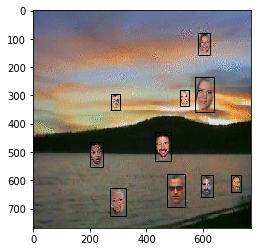

In [12]:
plt.imshow(test_bg.image)
for i in test_bg.face_boxes:
    plt.gca().add_patch(plt.Rectangle([i[0],i[1]], i[2],i[3], fill=False))

In [ ]:
for i in test_bg.face_boxes:
    print(i)

In [ ]:
def crop_image(face, face_mask,tol=0):
    # img is 2D image data
    # tol  is tolerance
    face_mask = np.array(face_mask)
    face = np.array(face)
    mask = face_mask>tol
    mask_idx = np.ix_(mask.any(1),mask.any(0))
    face_mask = Image.fromarray(face_mask[mask_idx])
    face = Image.fromarray(face[mask_idx])
    
    return face, face_mask

In [ ]:
face_path ='neck_cropped_faces/' + faces[face]

face_img = Image.open(face_path)
face_img_mask = trim(face_img)

In [ ]:
face_img, face_img_mask  = crop_image(face_img, face_img_mask)

In [ ]:
plt.subplot(1,2,1)
plt.imshow(face_img)
plt.subplot(1,2,2)
plt.imshow(face_img_mask)


In [ ]:
if face_landmarks_list:
    chin = np.array(face_landmarks_list[0]['chin'])
    nose_tip = np.array(face_landmarks_list[0]['nose_tip'])
    nose_bridge = np.array(face_landmarks_list[0]['nose_bridge'])
    print(chin[:,0], chin[:,1])
    print(face_landmarks_list[0].keys())
    plt.imshow(image)
    plt.scatter(chin[:,0], chin[:,1])
    plt.scatter(nose_tip[:,0], nose_tip[:,1], c='r')
    plt.scatter(nose_bridge[:,0], nose_bridge[:,1], c='g')
else:
    plt.imshow(image)

In [ ]:
for i in range(5):
    print(test_bg.face_boxes[i].xmin, test_bg.face_boxes[i].ymin)
    
print(bbox_iou(test_bg.face_boxes[0], test_bg.face_boxes[2]))

In [ ]:
%matplotlib inline
# temp = np.abs(0.5+np.random.randn(1000)*0.15)
# temp = np.random.exponential(0.1,100000)
temp = np.random.beta(1.5, 15, 100000)
plt.hist(temp, 100)
plt.show()

In [ ]:
count = 0

with open('category_2_without_body'+'.txt', 'w') as writer:
    for idx in range(4000):
        back = backgrounds[np.random.randint(num_back)]
        bg = Background('Backgrounds/'+back)
        bg.overlap_threshold = 0
        no_faces = 1+np.int(np.random.exponential(0.1)*100)
        faces_rand = np.random.choice(num_faces, size=(no_faces), replace=False)
        for face in faces_rand:    
            bg.place_face('neck_cropped_faces/'+faces[face])   
    #         bg.show()
        bg.save('without_body_data/', writer)
        count = count+1
        print(count)
bg.show()

0
7


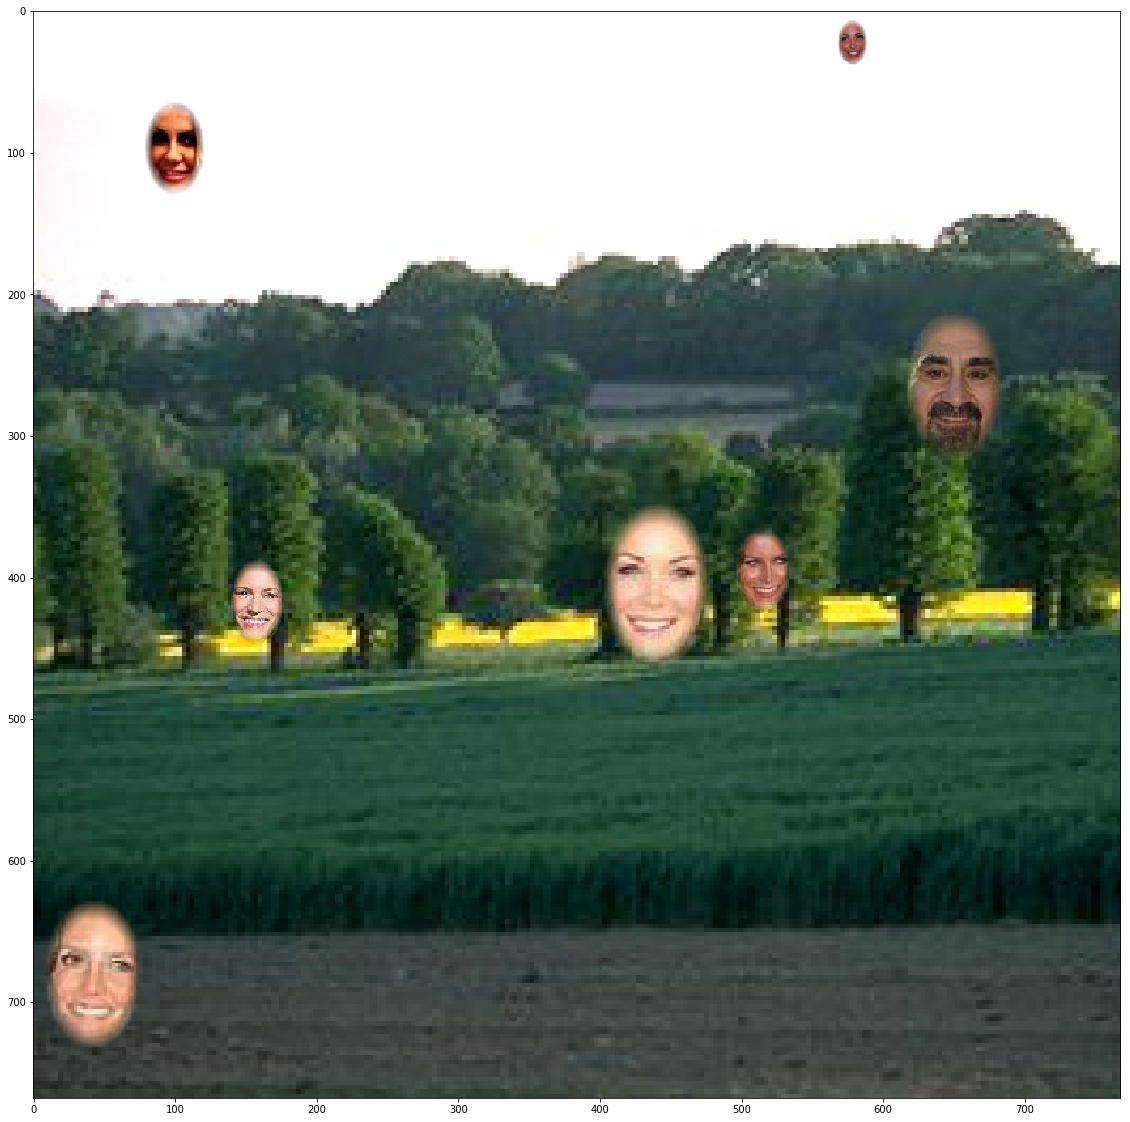

In [19]:
plt.figure(figsize=(20,20))

back = backgrounds[np.random.randint(0,len(backgrounds))]
test_bg = Background('Backgrounds/'+back)
test_bg.overlap_threshold  = 0
test_bg.std_step = -0.9
tweaker = 0.05
weights = (tweaker*2.4,tweaker*2.5)
print(test_bg.overlap_threshold)
# no_faces = 1+np.int(np.random.beta(2, 5)*100)
no_faces = 1+np.int(np.random.exponential(0.1)*100)
print(no_faces)
faces_rand = np.random.choice(num_faces, size=(no_faces), replace=False)
# faces_rand = [0]

for face in faces_rand:
#     print(face)
    test_bg.place_face('cropped_fewer/' + faces[face], blur=True, kernal_weights = weights)
#     test_bg.place_face('neck_cropped_faces/' + faces[face], blur=False, kernal_weights = weights)

test_bg.show()
# test_bg.save('./')

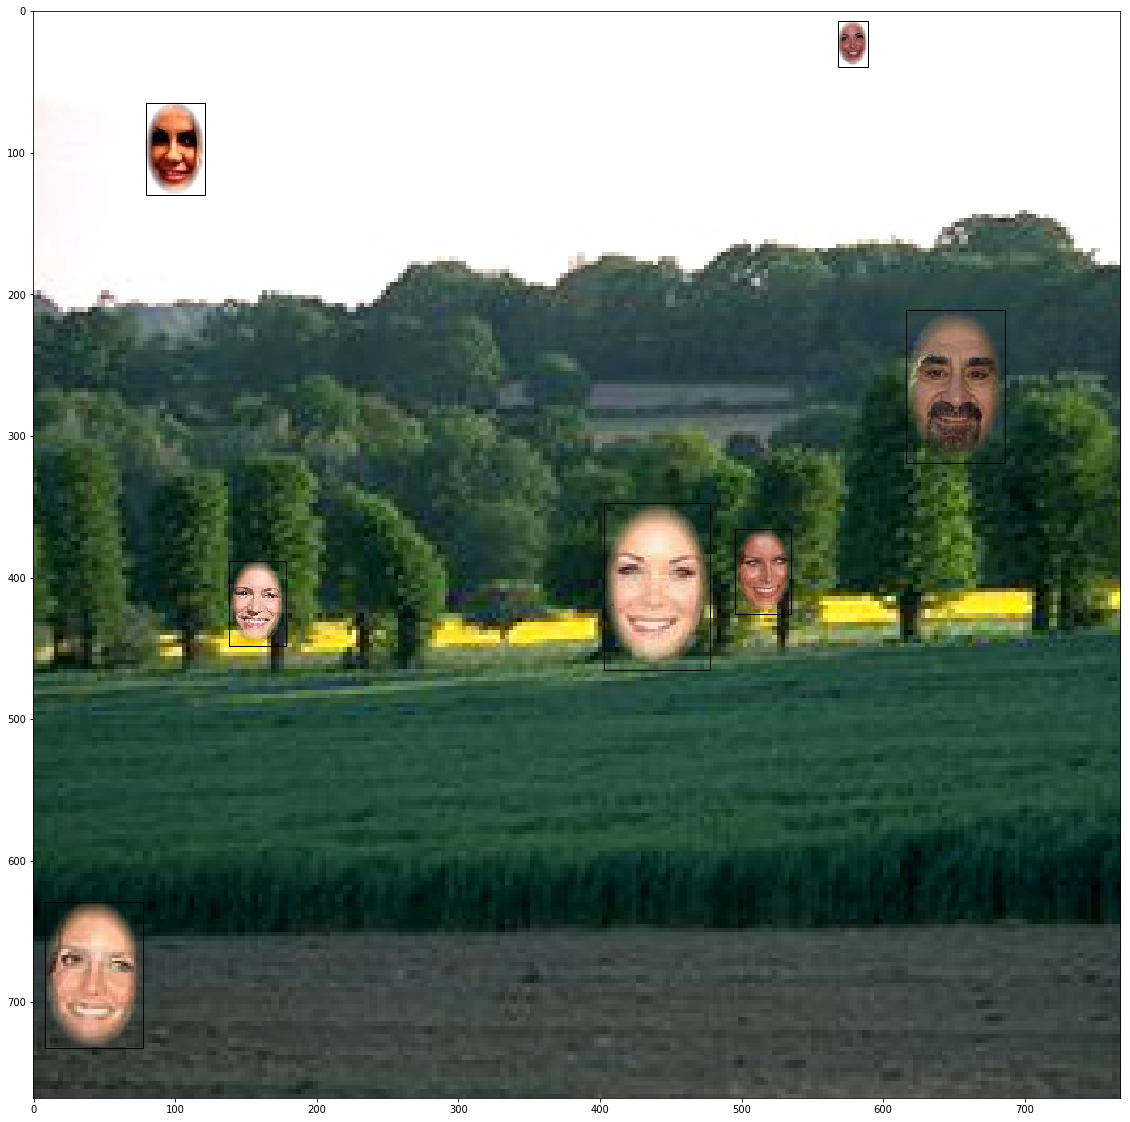

In [20]:
plt.figure(figsize=(20,20))
plt.imshow(test_bg.image)
for i in test_bg.face_boxes:
    plt.gca().add_patch(plt.Rectangle([i[0],i[1]], i[2],i[3], fill=False))

In [ ]:
count = 0
tweaker = 0.05
weights = (tweaker*2.4,tweaker*2.5)

with open('category_3_without_contour'+'.txt', 'w') as writer:
    for idx in range(4000):
        back = backgrounds[np.random.randint(num_back)]
        bg = Background('Backgrounds/'+back)
        
        bg.overlap_threshold = 0
        bg.std_step = -0.9
        
        no_faces = 1+np.int(np.random.exponential(0.1)*100)
        faces_rand = np.random.choice(num_faces, size=(no_faces), replace=False)
        for face in faces_rand:    
            bg.place_face('cropped_fewer/' + faces[face], blur=True, kernal_weights = weights)
    #         bg.show()
        bg.save('without_contour_data/', writer)
#         count = count+1
#         print(count)

for i in bg.face_boxes:
    plt.gca().add_patch(plt.Rectangle([i[0],i[1]], i[2],i[3], fill=False))
bg.show()

In [ ]:
count = 0

for back in backgrounds:
    bg = Background('Backgrounds/'+back)
    bg.overlap_threshold = 0
    no_faces = np.random.randint(1, 6)
    faces_rand = np.random.randint(num_faces, size=(no_faces))
    for face in faces_rand:
        bg.place_face('cropped/'+faces[face])   
        bg.show()
    bg.save('output/')
    count = count+1
#     print(count)


In [ ]:
count = 0
tweaker = 1
weights = (tweaker*2,tweaker*2.5)

for back in backgrounds:
    bg = Background('Backgrounds/'+back)
    bg.overlap_threshold = 0
    no_faces = np.random.randint(1, 6)
    faces_rand = np.random.randint(num_faces, size=(no_faces))
    for face in faces_rand:
        bg.place_face('cropped/'+faces[face] , blur=True, kernal_weights = weights)   
        bg.show()
    bg.save('output_blurred/')
    count = count+1
#     print(count)


In [ ]:
import numpy as np


def gkern(x=5, y=5, sig_x=1., sig_y=1., mu_x = 2, mu_y = 2):
    """
    creates gaussian kernel with side length l and a sigma of sig
    """

    ax = np.arange(-x // 2 + 1., x // 2 + 1.)
    ay = np.arange(-y // 2 + 1., y // 2 + 1.)
    xx, yy = np.meshgrid(ax, ay)
    print(xx)
    kernel = np.exp(-0.5 * (np.square(xx - mu_x) + np.square(yy)) / np.square(sig))

    return kernel / np.sum(kernel)

In [ ]:
a = gkern(x = 100, y = 150, sig = 20, mu_x = 30)
plt.imshow(a)

In [ ]:
def gkern(kernlen_x=21,kernlen_y=21, nsig_x=3, nsig_y=4, mu_x=2,mu_y=-4):
    """Returns a 2D Gaussian kernel array."""

    interval_x = (2*nsig_x+1.)/(kernlen_x)
    interval_y = (2*nsig_y+1.)/(kernlen_y)
    x = np.linspace(-nsig_x-interval_x/2., nsig_x+interval_x/2., kernlen_x+1)
    y = np.linspace(-nsig_y-interval_y/2., nsig_y+interval_y/2., kernlen_y+1)
    kern1d = np.diff(st.norm.cdf(x-(2*mu_x )/kernlen_x))
    kern2d = np.diff(st.norm.cdf(y-(2*mu_y )/kernlen_y))
    kernel_raw = np.sqrt(np.outer(kern1d, kern2d))
    kernel = kernel_raw/kernel_raw.sum()
    return kernel


def get_kern(kernlen_x, kernlen_y, sig_x1, sig_y1, sig_x2, sig_y2, mu_x1, mu_y1, mu_x2, mu_y2):
    return gkern(kernlen_x, kernlen_y, sig_x1, sig_y1, mu_x1, mu_y1) , gkern(kernlen_x, kernlen_y,sig_x2, sig_y2,mu_x2, mu_y2)

In [ ]:
test_face = Image.open('cropped_better/' + faces[15])

data = np.array(test_face.getdata())
blank_img = Image.fromarray(np.ones(test_face.size[::-1] + tuple([3]), dtype = np.uint8)*255)

kern1, kern2 = get_kern(test_face.size[1],test_face.size[0],1.15,1, 1.5,1, -test_face.size[1]*0.1, 0, test_face.size[1]*0.35, 0)


kern1 = kern1/np.max(kern1)
th_1 = (np.mean(kern1) + 0.05*np.std(kern1)) 
kern1[kern1 < th_1] = np.nan
kern1 = np.log(kern1)
kern1 -= np.nanmin(kern1)
kern1 /= np.nanmax(kern1)
kern1 *=768
kern1 = np.nan_to_num(kern1)

kern2 = nkern(test_face.size[1],test_face.size[0], 4, 10, 4*test_face.size[1],0)
kern2 /= np.nanmax(kern2)
kern2 = 1-kern2

th_2 = (np.mean(kern1) + 0.05*np.std(kern2)) 
kern2[kern2 < th_1] = np.nan

kern2 = np.log(kern2+1e-12)
print(kern2)
kern2 -= np.nanmin(kern2)
kern2 /= np.nanmax(kern2)
kern2 *= 255
kern2 = np.nan_to_num(kern2)


# kern2 = kern2/np.max(kern2)
# th_2 = (np.mean(kern2) + 0.9*np.std(kern2)) 
# kern2[kern2 < th_2] = np.nan
# kern2 = np.log(kern2)
# kern2 -= np.nanmin(kern2)
# kern2 /= np.nanmax(kern2)
# kern2 *=768
# kern2 = np.nan_to_num(kern2)


kern = kern1 + kern2
# kern =  kern2
# kern =  kern1
print ((np.unique(kern)))
kern[kern>255] = 255

x_img = Image.fromarray(np.uint8(kern))

x_img = x_img.filter(ImageFilter.MinFilter(5))


blank_img.paste(test_face, (0,0), x_img)


plt.subplot(1,3,1)
# plt.imshow(test_face)
plt.imshow(blank_img)
plt.colorbar()

plt.subplot(1,2,2)
plt.imshow(kern)
plt.colorbar()


plt.subplots_adjust(left = 28, right = 30)

In [ ]:
tweaker = 0.25

test_face = Image.open('cropped_better/' + faces[51])

x = gkern(test_face.size[1],test_face.size[0],2.0*tweaker,1.8*tweaker);

data = np.array(test_face.getdata())
blank_img = Image.fromarray(np.ones(test_face.size[::-1] + tuple([3]), dtype = np.uint8)*255)

print(test_face.size)
print(data.shape)


x = x/np.max(x)
th = (np.mean(x) + 0.35*np.std(x)) 
print(th)
x[x < th] = np.nan


# data[...,3] = x

# x_ = np.exp(x)
x_ = np.log(x)
print(np.nanmin(x_))
x_ = x_ - np.nanmin(x_)

# x_[x_ < (np.log(th)-np.min(x_))] = 0
# x_ = 1.3**x_
x_ = x_/np.nanmax(x_)
x_ = x_*255

x[x >= th] = 255
# x = x*255

x_img = Image.fromarray(np.uint8(x_))

x_img = x_img.filter(ImageFilter.MinFilter(5))

blank_img.paste(test_face, (0,0), x_img)


plt.subplot(1,2,1)
plt.imshow(blank_img)
plt.colorbar()

plt.subplot(1,2,2)
plt.imshow(x_)
plt.colorbar()

plt.subplots_adjust(left = 28, right = 30)

In [ ]:
def nkern(kernlen_x=21,kernlen_y=21, nsig_x=3, nsig_y=4, mu_x=2,mu_y=-4):
    """Returns a 2D Gaussian kernel array."""

    interval_x = (2*nsig_x+1.)/(kernlen_x)
    interval_y = (2*nsig_y+1.)/(kernlen_y)
    x = np.linspace(-nsig_x-interval_x/2., nsig_x+interval_x/2., kernlen_x+1)
    y = np.linspace(-nsig_y-interval_y/2., nsig_y+interval_y/2., kernlen_y+1)
    kern1d = 1- np.diff(st.norm.cdf(x-(2*mu_x )/kernlen_x))
    kern2d = 1- np.diff(st.norm.cdf(y-(2*mu_y )/kernlen_y))
    kernel_raw = np.sqrt(np.outer(kern1d, kern2d))
    kernel = kernel_raw/kernel_raw.sum()
    return kernel

In [ ]:
a = nkern(540,450, 4,10,2000,0)
g = gkern(540,450, 2,2)
g = g/np.nanmax(g)

# g[g<0.2] =0
a = a/np.nanmax(a)
a = 1-a
# print(a)
a = np.log(a+1e-12)
a = a - np.nanmin(a)
a = a/np.nanmax(a)
a = 3*a #+ 2*g



plt.imshow(a, vmax = 3)

plt.colorbar()

In [ ]:

edges = feature.canny(np.asarray(test_face)[:,:,0], sigma =1)
plt.imshow(edges)